In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

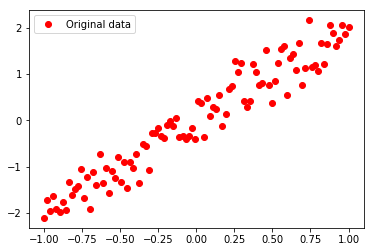

In [2]:
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
#显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [4]:
# 创建模型
plotdata = { "batchsize":[], "loss":[] }
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
weight = 0
bias = 0
# 前向结构
z = tf.multiply(X, W)+ b

#反向优化
cost =tf.reduce_mean( tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# 初始化变量
init = tf.global_variables_initializer()
# 训练参数
training_epochs = 20
display_step = 2

# 启动session
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    weight = sess.run(W)
    bias = sess.run(b)
    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    #print ("cost:",cost.eval({X: train_X, Y: train_Y}))

Epoch: 1 cost= 1.0316434 W= [0.4888598] b= [0.43711233]
Epoch: 3 cost= 0.18181598 W= [1.5564847] b= [0.15230192]
Epoch: 5 cost= 0.10954015 W= [1.846125] b= [0.04325549]
Epoch: 7 cost= 0.10398793 W= [1.9212453] b= [0.01446382]
Epoch: 9 cost= 0.10344648 W= [1.9406725] b= [0.00700931]
Epoch: 11 cost= 0.10336634 W= [1.9456965] b= [0.00508145]
Epoch: 13 cost= 0.103349626 W= [1.946995] b= [0.00458309]
Epoch: 15 cost= 0.10334556 W= [1.9473314] b= [0.00445404]
Epoch: 17 cost= 0.10334454 W= [1.9474181] b= [0.00442081]
Epoch: 19 cost= 0.10334429 W= [1.9474398] b= [0.00441239]
 Finished!
cost= 0.103344224 W= [1.9474438] b= [0.00441082]


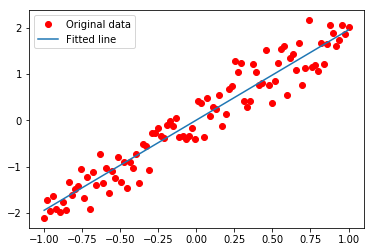

In [5]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, weight * train_X + bias, label='Fitted line')
plt.legend()
plt.show()

In [6]:
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

Text(0.5,1,'Minibatch run vs. Training loss')

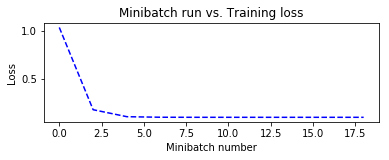

In [8]:
plotdata["avgloss"] = moving_average(plotdata["loss"])
plt.subplot(211)
plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
plt.xlabel('Minibatch number')
plt.ylabel('Loss')
plt.title('Minibatch run vs. Training loss')

In [ ]:
print(plotdata)

{'batchsize': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18], 'loss': [1.0316434, 0.18181598, 0.10954015, 0.10398793, 0.10344648, 0.10336634, 0.103349626, 0.10334556, 0.10334454, 0.10334429], 'avgloss': [1.0316434, 0.18181598, 0.10954015, 0.10398793, 0.10344648, 0.10336634, 0.103349626, 0.10334556, 0.10334454, 0.10334429]}
